

# Project: Investigate No-Show Appointments Dataset
>   **Project 2 - Ghadah Alabduljabbar**

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


### Dataset Description 

<a href="https://www.kaggle.com/datasets/joniarroba/noshowappointments"> No-Show Appointments Dataset </a> has information about patient medical appointments in Brazil and if the patients showed-up or not to their appointments. This dataset has 110.527 medical appointments and 14 associated attributes, which are:
<ul>
<li> PatientId </li>
<li> AppointmentID </li>
<li> ScheduledDay </li>
<li> AppointmentDay </li>
<li> Gender </li>
<li> Age </li>
<li> Neighbourhood : Location of the hospital where the appointmet take place </li>
<li> Scholarship : If the patient enrolled in special program, 1-True, 0-False </li>
<li> Hipertension : 1-True, 0-False </li>
<li> Diabetes : 1-True, 0-False </li>
<li> Alcoholism : 1-True, 0-False</li>
<li> Handcap : Number of disability </li>
<li> SMS_received : 1-True, 0-False</li>
<li> No-show : No-The patient showed up, Yes-The patient didn't show up</li>
</ul>
** <strong>Note</strong> that Handcap attribute is written on kaggle dataset page as binary (1-True, 0-False) but in the dataset it ranges from 0 to 4, so after checking up in <a href="https://www.kaggle.com/datasets/joniarroba/noshowappointments/discussion/29699"> kaggle community </a> I learned that it's actually not binary and it mean the number of disability the patient has where 0 is none.


### Question(s) for Analysis
<ul>
After analyzing this dataset I should be able to answer these questions:
<li> Q1: What are the trends (rates and characteristics) among the patients who showed up for their appointment and the patients who didn’t show up?  </li>
<li> Q2: What are the important factors that affect the patient's appearance to their appointment? </li> 
</ul>

In [1]:
# Import all packages that will be used 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


In [2]:
# Load the data and show some information about it
df = pd.read_csv("noshowappointments.csv")
df.shape
# (Number of rows, Number of columns)

(110527, 14)


### General Properties
I will show some general information about the dataset such as data types, missing, duplicate, unique, and possibly errant data.


In [3]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [4]:
df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


Next, we will check the data type of each attribute, and decide if we need to change the type of some of them:

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


For easier analysis, we need to change the data type of $ScheduledDay$ and $ScheduledDay$ from object to Date. <br>

Next, we will check if there's any duplicate or missing values:

In [6]:
sum(df.duplicated())

0

In [7]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

No duplicate nor missing values. <br>

Next, we will explore all attributes and check their values to see if there is any incorrect data using Pandas $unique$ function.

In [8]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

We can see from the number of unique values which attribute is binary which is not. Also, we can explore some attributes to check if there is any incorrect data.

In [9]:
df[(df.PatientId < 0) | (df.AppointmentID < 0)]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


In [10]:
df.Gender.unique()

array(['F', 'M'], dtype=object)

In [11]:
df.Gender.value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

In [12]:
df.ScheduledDay.unique()

array(['2016-04-29T18:38:08Z', '2016-04-29T16:08:27Z',
       '2016-04-29T16:19:04Z', ..., '2016-04-27T16:03:52Z',
       '2016-04-27T15:09:23Z', '2016-04-27T13:30:56Z'], dtype=object)

In [13]:
df.AppointmentDay.unique()

array(['2016-04-29T00:00:00Z', '2016-05-03T00:00:00Z',
       '2016-05-10T00:00:00Z', '2016-05-17T00:00:00Z',
       '2016-05-24T00:00:00Z', '2016-05-31T00:00:00Z',
       '2016-05-02T00:00:00Z', '2016-05-30T00:00:00Z',
       '2016-05-16T00:00:00Z', '2016-05-04T00:00:00Z',
       '2016-05-19T00:00:00Z', '2016-05-12T00:00:00Z',
       '2016-05-06T00:00:00Z', '2016-05-20T00:00:00Z',
       '2016-05-05T00:00:00Z', '2016-05-13T00:00:00Z',
       '2016-05-09T00:00:00Z', '2016-05-25T00:00:00Z',
       '2016-05-11T00:00:00Z', '2016-05-18T00:00:00Z',
       '2016-05-14T00:00:00Z', '2016-06-02T00:00:00Z',
       '2016-06-03T00:00:00Z', '2016-06-06T00:00:00Z',
       '2016-06-07T00:00:00Z', '2016-06-01T00:00:00Z',
       '2016-06-08T00:00:00Z'], dtype=object)

We can see the time for $AppointmentDay$ is set to zero so it will not affect the analysis, and for the time in $ScheduledDay$ we will create time ranges for it (Morning, Afternoon, and Night) to help us in our analysis, also we will create $AwaitingTime$ attribute to show how many days a patient waited until the appointment.

In [14]:
df.Handcap.unique()

array([0, 1, 2, 3, 4])

In [15]:
df.Handcap.value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

In [16]:
df.Age.min(), df.Age.max()

(-1, 115)

In [17]:
df.Age.unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1])


### Data Cleaning
From the previous step we can see this dataset has no missing or duplicate values, but we need to do some cleaning in the "Age" attribute because there's no -1 age, and since a recent <a href="https://www.smithsonianmag.com/smart-news/study-suggests-150-years-may-be-human-lifespans-upper-limit-180977899/"> study </a> mentioned that human age is somewhere between 120 and 150 years old, 115 looks right. <br>
For simplicity, we will change the $No-show$ column name to $Showed$.<br>
We also need to change the data type for $PatientId$ to Integer, $ScheduledDay$, and $AppointmentDay$ from Object to Date.

In [18]:
df.query('Age < 1')['Age'].value_counts()

 0    3539
-1       1
Name: Age, dtype: int64

For data with Patients age = 0, we are assuming these are for newborn babies, while the -1 is an incorrect data and since it's only one record we will delete it.

In [19]:
df.drop(df[df.Age < 0].index, inplace=True)
df.query('Age < 1')['Age'].value_counts()

0    3539
Name: Age, dtype: int64

In [20]:
df['No-show'].value_counts()

No     88207
Yes    22319
Name: No-show, dtype: int64

In [21]:
df.rename(columns={'No-show': 'Showed'}, inplace=True)
df["Showed"].replace({"Yes": "No", "No": "Yes"}, inplace=True)
df['Showed'].value_counts()

Yes    88207
No     22319
Name: Showed, dtype: int64

In [22]:
df['PatientId'] = (df['PatientId']).astype('int64')

In [23]:
df['ScheduledDate'] = pd.to_datetime(df['ScheduledDay']).dt.date
df['ScheduledTime'] = pd.to_datetime(df['ScheduledDay']).dt.hour
df['AppointmentDate'] = pd.to_datetime(df['AppointmentDay']).dt.date
df['ScheduledDate'] = pd.to_datetime(df['ScheduledDate'])
df['AppointmentDate'] = pd.to_datetime(df['AppointmentDate'])
df.drop('ScheduledDay',axis=1, inplace = True)
df.drop('AppointmentDay',axis=1, inplace = True)

In [24]:
df['AwaitingTime'] = df['AppointmentDate'] - df['ScheduledDate']

In [25]:
df['ScheduledPeriod'] = df.apply(lambda row: 
                                 'Morning' if (row['ScheduledTime'] < 12) 
                                  else ('Afternoon' if row['ScheduledTime'] >= 12 and row['ScheduledTime'] <=16
                                  else 'Night'), axis=1)
df.drop('ScheduledTime',axis=1, inplace = True)

In [26]:
df['ScheduledPeriod'].value_counts()

Morning      68480
Afternoon    37206
Night         4840
Name: ScheduledPeriod, dtype: int64

In [27]:
df[df.AwaitingTime  < '0 days']

,PatientId,AppointmentID,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Showed,ScheduledDate,AppointmentDate,AwaitingTime,ScheduledPeriod
27033,7839272661752,5679978,M,38,RESISTÊNCIA,0,0,0,0,1,0,No,2016-05-10,2016-05-09,-1 days,Morning
55226,7896293967868,5715660,F,19,SANTO ANTÔNIO,0,0,0,0,1,0,No,2016-05-18,2016-05-17,-1 days,Afternoon
64175,24252258389979,5664962,F,22,CONSOLAÇÃO,0,0,0,0,0,0,No,2016-05-05,2016-05-04,-1 days,Afternoon
71533,998231581612122,5686628,F,81,SANTO ANTÔNIO,0,0,0,0,0,0,No,2016-05-11,2016-05-05,-6 days,Afternoon
72362,3787481966821,5655637,M,7,TABUAZEIRO,0,0,0,0,0,0,No,2016-05-04,2016-05-03,-1 days,Morning


Seeing the waiting period less than zero in 5 records (Booked after the appointments), and as we can see from the $Showd$ column all of them didn't show up, therefor, we will delete them from our analysis.

In [28]:
df.drop(df[df.AwaitingTime < '0 days'].index, inplace=True)

Now for easier visualization, we will keep only  day numbers 

In [29]:
df['AwaitingTime'] = df['AwaitingTime'].dt.components.days

In [30]:
df.shape

(110521, 16)

Next, we will check top 5 patients who booked the highest number of appointments to see if using patients' id in our analysis has a notable effect on the patient's appearance or not.

In [31]:
df.PatientId.value_counts().head()

822145925426128    88
99637671331        84
26886125921145     70
33534783483176     65
871374938638855    62
Name: PatientId, dtype: int64

In [32]:
df[df.PatientId == 822145925426128].Showed.value_counts()

Yes    87
No      1
Name: Showed, dtype: int64

In [33]:
df[df.PatientId == 99637671331].Showed.value_counts()

Yes    80
No      4
Name: Showed, dtype: int64

In [34]:
df[df.PatientId == 26886125921145].Showed.value_counts()

Yes    70
Name: Showed, dtype: int64

In [35]:
df[df.PatientId == 33534783483176].Showed.value_counts()

Yes    65
Name: Showed, dtype: int64

In [36]:
df[df.PatientId == 871374938638855].Showed.value_counts()

Yes    59
No      3
Name: Showed, dtype: int64


Seeing that it has no notable effect we will delete the $PatientId$ and in our analysis, we will focus on the $AppointmentID$.

In [37]:
df.drop('PatientId',axis=1, inplace = True)
df.shape

(110521, 15)

In [38]:
df.head(1)

,AppointmentID,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Showed,ScheduledDate,AppointmentDate,AwaitingTime,ScheduledPeriod
0,5642903,F,62,JARDIM DA PENHA,0,1,0,0,0,0,Yes,2016-04-29,2016-04-29,0,Night


<a id='eda'></a>
## Exploratory Data Analysis

Before answering our research questions we will show the overall patient appointments show-up rate.

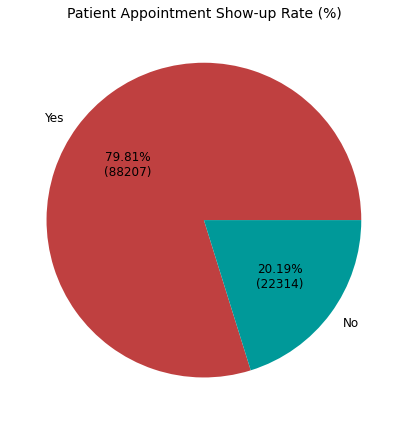

In [39]:
def pie_fmt(x):
    return '{:.2f}%\n({:.0f})'.format(x, total*x/100)
    
fig, ax = plt.subplots(figsize=(6, 6))
dfY = df['Showed']
counts = dfY.value_counts()
total = len(dfY)
ax.pie(counts, labels=counts.index, autopct=pie_fmt, textprops={'size': 'large'}, colors = ['#bf4040', '#009999'])
ax.set_title('Patient Appointment Show-up Rate (%)', fontsize=14)
plt.tight_layout();

From the pie chart, we can see that, the rate of patients showing up to their appointment is **79.81%**, while **20.19%** of the patients didn't show up to their appointment.

In [40]:
def BarChart(variable, labels):
    df_bar = pd.crosstab(df[variable], df.Showed, normalize = 'index')
    df_bar = np.round((df_bar * 100), decimals=2)
    ax = df_bar.plot.bar(figsize=(10,5), color = ['#009999', '#bf4040'])
    ax.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    ax.set_xticklabels(labels)
    plt.xticks(rotation=0)
    ax.set_title('Patient Show-up by '+ variable + ' (%)', fontsize = 15)
    ax.set_xlabel(df_bar.index.name, fontsize = 12)
    ax.set_ylabel('Patient %', fontsize = 12)
    return df_bar

### Q1: What are the trends (rate and characteristics) among the patients who showed up for their appointment and the patients who didn’t show up?

- ### Gender

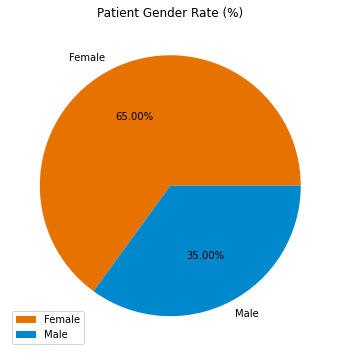

In [41]:
df.groupby(['Gender']).count().plot(kind='pie', labels=['Female','Male'], y='AppointmentID',
                                    title="Patient Gender Rate (%)", autopct='%.2f%%', 
                                    colors = ['#e67300', '#0088cc'], label="", figsize=(6, 6));

Showed,No,Yes
Gender,,
F,20.31,79.69
M,19.96,80.04


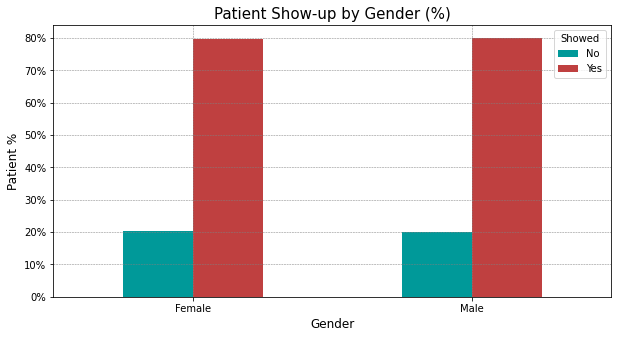

In [42]:
BarChart('Gender', ['Female', 'Male'])

Looking at the charts above we can see that: 
- **65.00%** of the appointments were for female patients, while **35.00%** of the appointments were for male patients.
- The showing-up rate of female patients is **79.69%** which is slightly lower than the male patient rate of **80.04%**, with a variance equal to **0.35%**.

- ### Scholarship

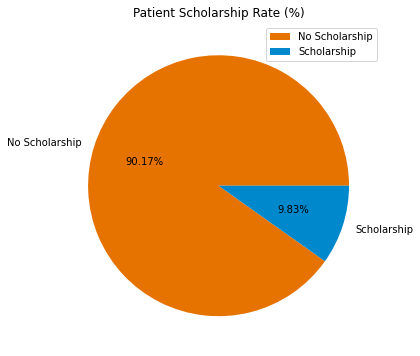

In [43]:
df.groupby(['Scholarship']).count().plot(kind='pie', labels=['No Scholarship', 'Scholarship'], y='AppointmentID',
                                    title="Patient Scholarship Rate (%)", autopct='%.2f%%', 
                                    colors = ['#e67300', '#0088cc'], label="", figsize=(6, 6));

Showed,No,Yes
Scholarship,,
0,19.80,80.20
1,23.74,76.26


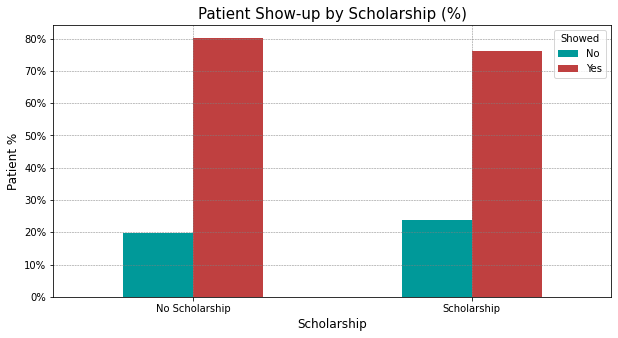

In [44]:
BarChart('Scholarship', ['No Scholarship', 'Scholarship'])

Looking at the charts above we can see that: 
- **90.17%** of the patients who made appointments don't have a scholarship, while only **9.83%** of them have a scholarship.
- The appointment showing-up rate of the patients who don't have a scholarship is 80.20% which is higher than the patient who has one (**76.26%**), with a variance equal to **3.94%**.

- ### Hipertension

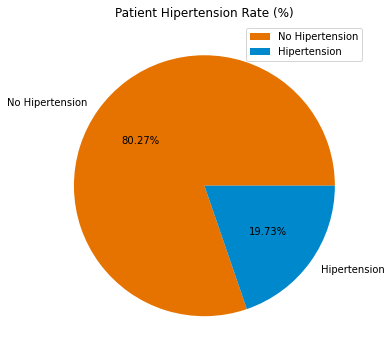

In [45]:
df.groupby(['Hipertension']).count().plot(kind='pie', labels=['No Hipertension', 'Hipertension'], y='AppointmentID',
                                    title="Patient Hipertension Rate (%)", autopct='%.2f%%', 
                                    colors = ['#e67300', '#0088cc'], label="", figsize=(6, 6));

Showed,No,Yes
Hipertension,,
0,20.9,79.1
1,17.3,82.7


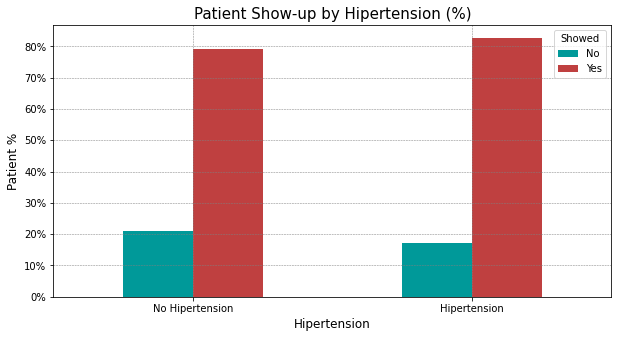

In [46]:
BarChart('Hipertension', ['No Hipertension', 'Hipertension'])

Looking at the charts above we can see that: 
- The majority of the patients **80.27%** don't have Hipertension, only **19.73%** of them have it. 
- The appointment showing-up rate of the patients who have Hipertension is **82.70%** which is higher than patients who don't have Hipertension (**79.10%**), with a variance equal to **3.60%**.

- ### Diabetes

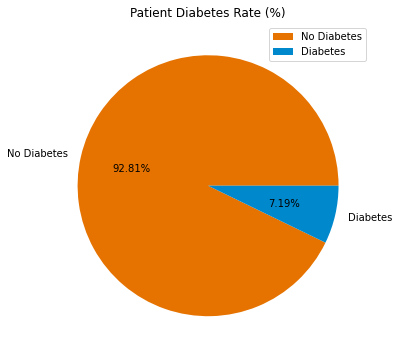

In [47]:
df.groupby(['Diabetes']).count().plot(kind='pie', labels=['No Diabetes', 'Diabetes'], y='AppointmentID',
                                    title="Patient Diabetes Rate (%)", autopct='%.2f%%', 
                                    colors = ['#e67300', '#0088cc'], label="", figsize=(6, 6));

Showed,No,Yes
Diabetes,,
0,20.36,79.64
1,18.00,82.00


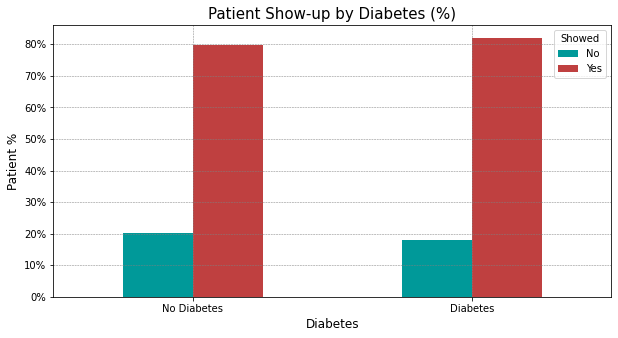

In [48]:
BarChart('Diabetes', ['No Diabetes', 'Diabetes'])

Looking at the charts above we can see that: 
- The majority of the patients **92.81%** don't have Diabetes, while only **7.19%** of them have it. 
- The appointment showing-up rate of the patients who have Diabetes (**82.00%**) is higher than patients who don't have Diabetes (**79.64%**), with a variance equal to **2.36%**.

- ### Alcoholism

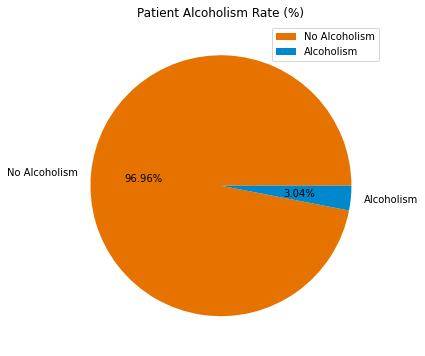

In [49]:
df.groupby(['Alcoholism']).count().plot(kind='pie', labels=['No Alcoholism', 'Alcoholism'], y='AppointmentID',
                                    title="Patient Alcoholism Rate (%)", autopct='%.2f%%', 
                                    colors = ['#e67300', '#0088cc'], label="", figsize=(6, 6));

Showed,No,Yes
Alcoholism,,
0,20.19,79.81
1,20.15,79.85


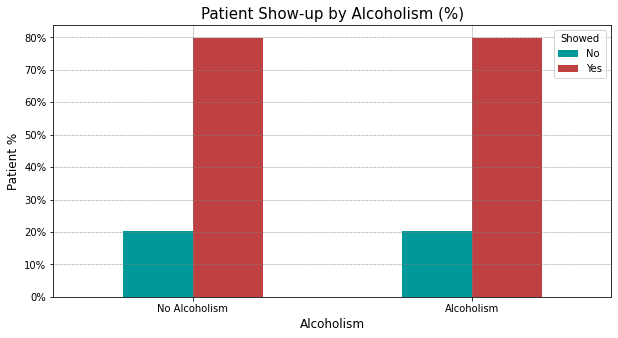

In [50]:
BarChart('Alcoholism', ['No Alcoholism', 'Alcoholism'])

Looking at the charts above we can see that: 
- A minority of the patients have Alcoholism (**3.04%**), while the majority don't have it (**96.96%**).
- The appointment showing-up rate of the patients who have Alcoholism is **79.85%**, which is slightly higher than patients who don't have Alcoholism (**79.81%**), with a very small variance equal to **0.04%**.

- ### Handcap

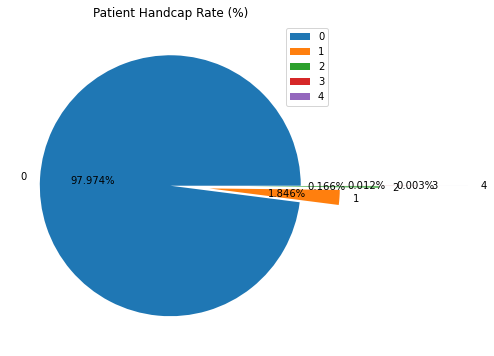

In [51]:
df.groupby(['Handcap']).count().plot(kind='pie', labels=[0,1,2,3,4], y='AppointmentID',
                                    title="Patient Handcap Rate (%)", autopct='%.3f%%', 
                                    label="", figsize=(6, 6), explode=(0, 0.3, 0.6, 0.9,1.28));

Showed,No,Yes
Handcap,,
0,20.23,79.77
1,17.84,82.16
2,20.22,79.78
3,23.08,76.92
4,33.33,66.67


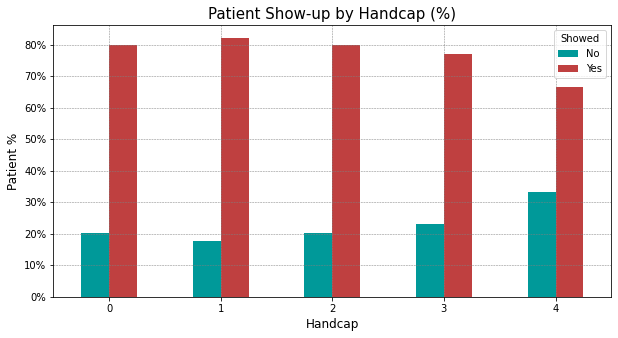

In [52]:
BarChart('Handcap', [0,1,2,3,4])

Looking at the charts above we can see that: 
- The majority of the patients don't have any Handcaps (**97.974%**), and **1.846%** of them have 1 Handcap, **0.166%** have 2 Handcaps, **0.012%** have 3 Handcaps, and lastly **0.003%** of them have 4 Handcaps.
- The highest showing-up rate is for patients who have 1 handcap which is **82.16%**, while the lowest rate is **66.67%** for patients who have 4 handcaps, with a variance equal to **15.49%**.

- ### SMS_received

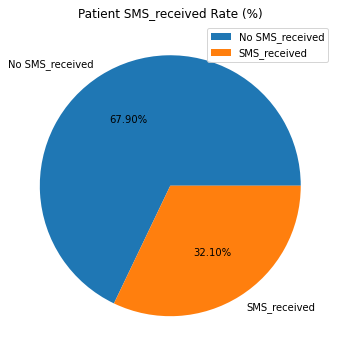

In [53]:
df.groupby(['SMS_received']).count().plot(kind='pie', labels=['No SMS_received', 'SMS_received'], y='AppointmentID',
                                    title="Patient SMS_received Rate (%)", autopct='%.2f%%', 
                                    label="", figsize=(6, 6));

Showed,No,Yes
SMS_received,,
0,16.70,83.30
1,27.57,72.43


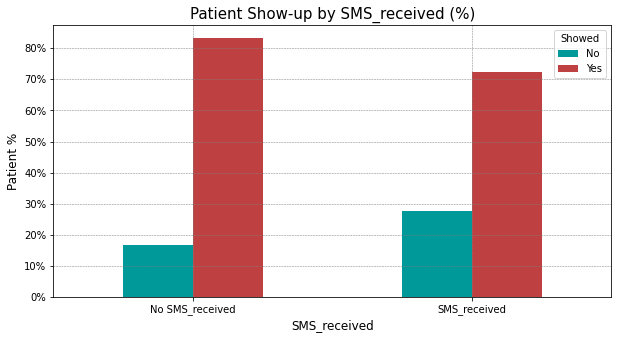

In [54]:
BarChart('SMS_received', ['No SMS_received', 'SMS_received'])

Looking at the charts above we can see that: 
- The majority of patients **3.04%** didn't receive SMS messages about their appointment and **96.96%** of them received SMS messages about their appointment.
- The appointment showing-up rate of patients who received SMS messages is **72.43%**, which is lower than patients who didn't receive SMS messages (**83.30%**), with a variance equal to **10.87%**.

- ### ScheduledPeriod

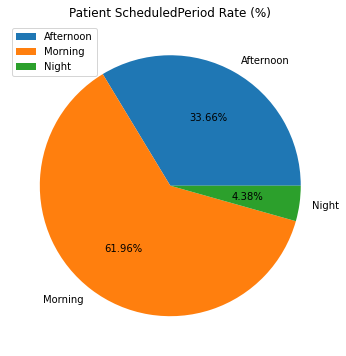

In [55]:
df.groupby(['ScheduledPeriod']).count().plot(kind='pie', labels=['Afternoon','Morning', 'Night'], y='AppointmentID',
                                    title="Patient ScheduledPeriod Rate (%)", autopct='%.2f%%', 
                                    label="", figsize=(6, 6));

Showed,No,Yes
ScheduledPeriod,,
Afternoon,22.18,77.82
Morning,18.85,81.15
Night,23.80,76.20


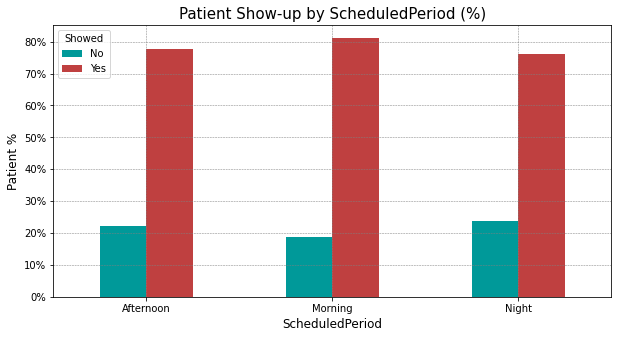

In [56]:
BarChart('ScheduledPeriod', ['Afternoon','Morning', 'Night'])

Looking at the charts above we can see that: 
- The majority of the appointments were scheduled in the morning **61.96%**, while **33.66%** of the appointments were scheduled in the afternoon, and the minority were scheduled at Night (**4.38%**).
- The highest patient showing-up rate was in the morning with **81.15%**, while the lowest showing-up rate was at night with **76.20%**, and the variance between the highest and the lowest rate is **4.95%**.

- ### Age

count    110521.000000
mean         37.089386
std          23.109885
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

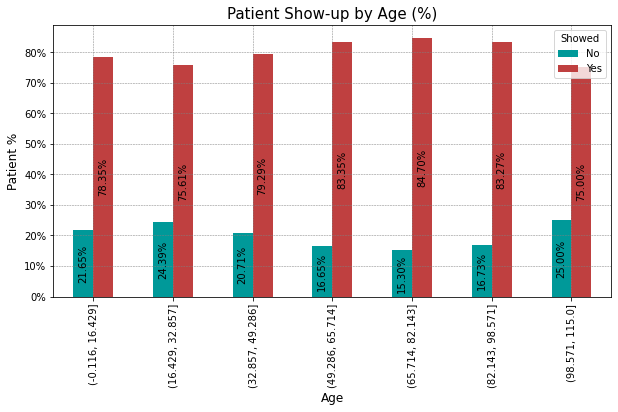

In [57]:
df_bar1 = pd.crosstab(pd.cut(df['Age'], bins=7, include_lowest=True), df['Showed'], normalize='index')
df_bar1 = np.round((df_bar1 * 100), decimals=2)
ax = df_bar1.plot.bar(figsize=(10,5), color = ['#009999', '#bf4040'])   
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
for c in ax.containers:
    ax.bar_label(c, labels=[f'{x:,.2f}%' for x in c.datavalues], label_type='center', rotation=90)
ax.set_title('Patient Show-up by Age (%)', fontsize = 15)
ax.set_xlabel(df_bar1.index.name, fontsize = 12)
ax.set_ylabel('Patient %', fontsize = 12);
df['Age'].describe()

Looking at the analysis above we can see that: 
- **75%** of the patients who made appointments have ages from 0 to 55, while the average age is 37.
- The highest showing-up rate was from patients with ages between 65 and 82 which is **84.70%**, while the lowest showing-up rate was from patients with ages between 98 and 115 (**75.00%**), and the variance between the highest and the lowest rate is **9.70%**.

- ### AwaitingTime

count    110521.000000
mean         10.184345
std          15.255153
min           0.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: AwaitingTime, dtype: float64

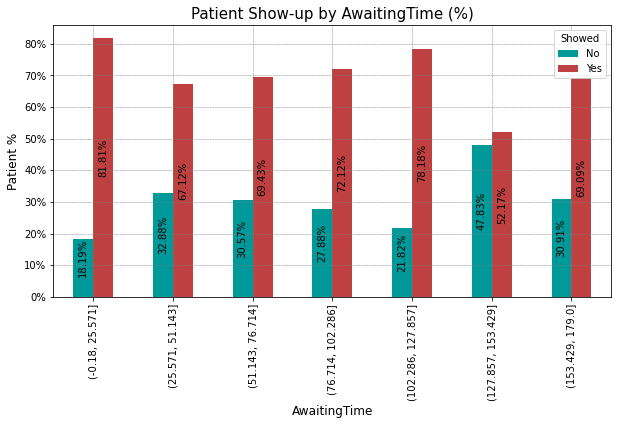

In [58]:
df_bar1 = pd.crosstab(pd.cut(df['AwaitingTime'], bins=7, include_lowest=True), df['Showed'], normalize='index')
df_bar1 = np.round((df_bar1 * 100), decimals=2)
ax = df_bar1.plot.bar(figsize=(10,5), color = ['#009999', '#bf4040'])                                   
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
for c in ax.containers:
    ax.bar_label(c, labels=[f'{x:,.2f}%' for x in c.datavalues], label_type='center', rotation=90, padding=10)
ax.set_title('Patient Show-up by AwaitingTime (%)', fontsize = 15)
ax.set_xlabel(df_bar1.index.name, fontsize = 12)
ax.set_ylabel('Patient %', fontsize = 12);
df['AwaitingTime'].describe()

Looking at the analysis above we can see that: 
- **75%** of the patients appointments had waiting time from 0 to 4 days, while the average is 10 days.
- The highest showing-up rate was from patients who had waiting time between 0 and 25 days which is **81.81%**, while the lowest showing-up rate was from patients who had waiting time between 127 and 135 days (**52.17%**), and the variance between the highest and the lowest rate is **29.64%**.

### Q2: What are the important factors that affect the patient's appearance to their appointment?

In order to know what are the important factors we will explore the association among one dependent variable (‘Showed’) and 3 independent variables.

From the previous question, we choose 3 variables among the variables that have variance greater than 3% to explore the effect with different combinations of them and find the important factors that affect the patients appearance to their appointment. The variables are $Scholarship$, $SMS received$,and $ScheduledPeriod$.

** <strong>Note</strong> that for this project we limited our selection to only 3 variables.

In [59]:
def BarChart2(variable1, variable2):
    df_result = (df.groupby([variable1,variable2]).Showed.value_counts(normalize=True)
          .rename('count').reset_index())
    df_result['count']  = np.round((df_result['count'] * 100), decimals=2)
    df_result = df_result.set_index([variable1,variable2, 'Showed']).unstack()
    df_result = df_result.droplevel(level=0, axis=1)
    ax = df_result.plot.bar(figsize=(10,5),  color = ['#009999', '#bf4040'])
    ax.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    plt.xticks(rotation=0)
    ax.set_title('Patient Show-up by '+ variable1 + ' and '+variable2+ ' (%)', fontsize = 15)
    ax.set_xlabel('(' + variable1 + ' , '+ variable2 + ')', fontsize = 12)
    ax.set_ylabel('Patient %', fontsize = 12)
    return df_result

- ### Scholarship and SMS_received

Showed                       No    Yes
Scholarship SMS_received              
0           0             16.45  83.55
            1             26.89  73.11
1           0             18.95  81.05
            1             33.78  66.22

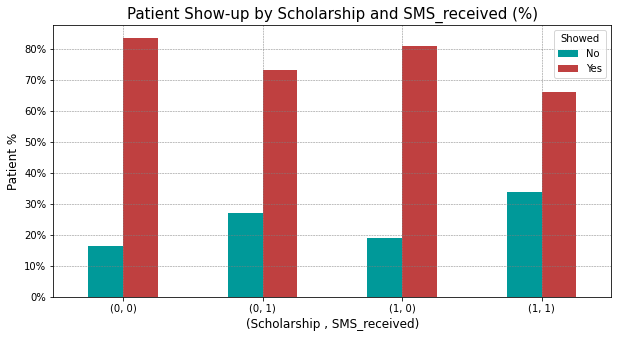

In [60]:
BarChart2('Scholarship','SMS_received')

Looking at the chart above we can see that: 
- Patients who have a scholarship and received SMS message about their appointment have the lowest show-up rate equal to **66.22%**.

- Patients who don’t have scholarship and didn’t receive SMS message about their appointment have the highest show-up rate equal to **83.55%**

- The variance between the highest and lowest rate is **17.33%**.

- Therefore, patients who don’t have scholarship and don’t receive SMS message about their appointment are more likely to show up than patients who have scholarship and received SMS message.

- ### Scholarship and ScheduledPeriod

Showed                          No    Yes
Scholarship ScheduledPeriod              
0           Afternoon        21.72  78.28
            Morning          18.47  81.53
            Night            23.64  76.36
1           Afternoon        26.53  73.47
            Morning          22.21  77.79
            Night            25.98  74.02

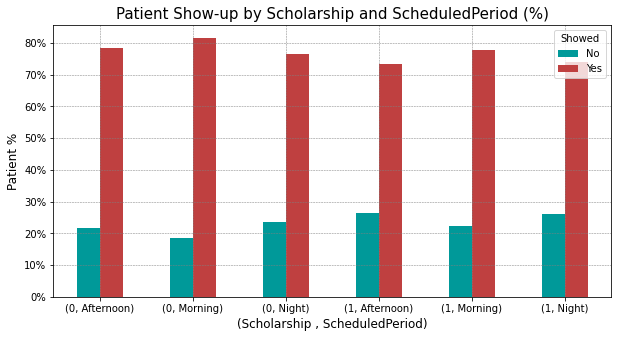

In [61]:
BarChart2('Scholarship','ScheduledPeriod')

Looking at the chart above we can see that: 
- Patients who don’t have scholarship and schedule their appointment in the morning have the highest show-up rate equal to **81.53%**

- Patients who have a scholarship and schedule their appointment in the afternoon have the lowest show-up rate equal to **73.47%**.

- The variance between the highest and lowest rate is **8.06%**.

- Therefore, patients who don’t have scholarship and schedule their appointment in the morning or afternoon are more likely to show up than patients who have scholarship and scheduled their appointment at any time of the day.

- ### ScheduledPeriod and SMS_received

Showed                           No    Yes
ScheduledPeriod SMS_received              
Afternoon       0             18.77  81.23
                1             28.70  71.30
Morning         0             15.39  84.61
                1             26.74  73.26
Night           0             20.48  79.52
                1             29.21  70.79

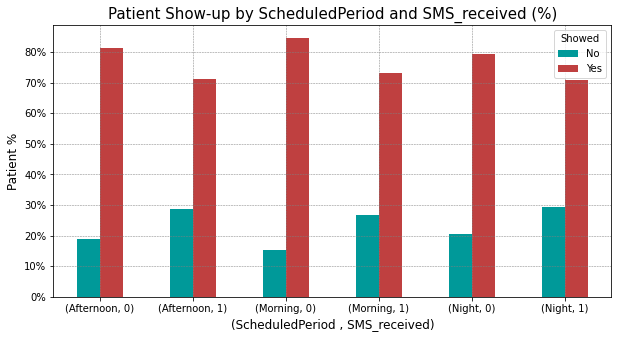

In [62]:
BarChart2('ScheduledPeriod','SMS_received')

Looking at the chart above we can see that: 

- Patients who schedule their appointment in the morning and didn’t receive SMS message have the highest show-up rate equal to **84.61%**

- Patients who schedule their appointment at the night and receive SMS message have the lowest show-up rate equal to **70.79%**.

- The variance between the highest and lowest rate is **13.82%**.

- Therefore, patients who don’t receive SMS message and schedule their appointments in the morning or the afternoon are more likely to show up than patients who receive SMS message and have their appointments at Night.

<a id='conclusions'></a>
## Conclusions

This project aim to investigate and analyze the No-Show Appointments dataset, and not aim to provide a final conclusion about the reasons for patients not showing up to their appointments, this analysis will highlight how some factors affect the patients appearance to their appointments based one this dataset.


### Analysis Summary:

After exploring the No-show Appointments dataset and seeing all patients appointment information, we start analyzing each factor according to patients showing up to their appointments or not, factors include Gender, Age, Scholarship, Hipertension, Diabetes, Alcoholism, Handcap, SMS_received, AwaitingTime, and ScheduledPeriod.

We start the exploratory analysis section by finding the answer to the first question "What are the trends (rates and characteristics) among the patients who showed up for their appointment and the patients who didn’t show up?", and find that:
- The showing-up rate of female patients is slightly lower than male patients.

- The appointment showing-up rate of the patients who don't have a scholarship is higher than the patient who has one.

- The appointment showing-up rate of the patients who have Hipertension is higher than patients who don't have Hipertension.

- The appointment showing-up rate of the patients who have Diabetes is higher than patients who don't have Diabetes.

- The appointment showing-up rate of the patients who have Alcoholism is slightly higher than patients who don't have Alcoholism.

- The highest showing-up rate is for patients who have 1 handcap, while the lowest rate is for patients who have 4 handcaps.

- The appointment showing-up rate of patients who received SMS messages is lower than patients who didn't receive SMS messages.

- The highest patient showing-up rate was from patients who scheduled their appointments in the morning, while the lowest showing-up rate was for night appointments.

- The highest showing-up rate was from patients with ages between 65 and 82 years old, while the lowest showing-up rate was from patients with ages between 98 and 115 years old.

- The highest showing-up rate was from patients who had a waiting time between 0 and 25 days, while the lowest showing-up rate was from patients who had a waiting time between 127 and 135 days.

- Checking the variance rate of these factors we find that Scholarship, Handcap, SMS_received, ScheduledPeriod, Age, and AwaitingTime have a notable effect on patient appearance to their appointments.


Next, we start investigating using 1 dependent variable (Showed) and 3 independent variables (Scholarship, SMS_received, and ScheduledPeriod) to answer the second question "What are the important factors that affect the patient's appearance to their appointment?" by exploring the association among these variables, and find that:

- Patients who don’t have scholarship and don’t receive SMS message about their appointment are more likely to show up than patients who have scholarship and received SMS message.

- Patients who don’t have scholarship and schedule their appointment in the morning or afternoon are more likely to show up than patients who have scholarship and scheduled their appointment at any time of the day.

- Patients who don’t receive SMS message and schedule their appointments in the morning or the afternoon are more likely to show up than patients who receive SMS message and have their appointments at Night.



### Limitations:
- The lack of clear documentation regarding each variable and clear definitions of them.

- With regards to the documentation, I found inconsistency in the date attributes as the majority of the rows has an appointment date after the scheduled date, and with zero timestamps for the appointment date, even after I investigate it there was no clear answer or explanation about the meaning of these 2 variables, as the dataset owner confirmed that it's not an error and the waiting period between these 2 dates is the main point that should be the focus, I went with this answer in my analysis.

- Since the majority of the columns have categorical data, the visualization in this project was limited to a Bar chart and Pie chart to perform the analysis.

### Further Notes:

- It will be useful if we have more information about the appointments, for example, the appointment type, whether it is a new appointment or a follow-up, the doctor's name, and in which department. 

- Machine learning techniques can be applied to be able to predict whether patients show up or not to their appointments.
